<a href="https://colab.research.google.com/github/siva-Parvathi-M/Medical-Insurance-Claims/blob/main/Medical_Insurance_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data**

In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/Colab Notebooks/Projects/Medical Insurance Claims.csv"  # change if needed
df = pd.read_csv(file_path)

# Quick checks
print("Rows,Cols:", df.shape)
display(df.head())
display(df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Rows,Cols: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64



Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Basic cleaning & type fixes**

In [ ]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Ensure numeric types
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['children'] = pd.to_numeric(df['children'], errors='coerce')
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

# Standardize categorical strings
for col in ['sex','smoker','region']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

**Handle missing values & outliers**

In [ ]:
# Missing: show rows with any nulls (if small, inspect)
display(df[df.isnull().any(axis=1)].head(10))

# Strategy:
# - If only a few missing rows, drop them
# - For bmi or age missing, you may fill with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['children'] = df['children'].fillna(0)  # reasonable default

# Charges: if any missing, drop (most datasets have charges present)
df = df.dropna(subset=['charges'])

,age,sex,bmi,children,smoker,region,charges


**Feature engineering**

In [ ]:
# 1) BMI category
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0,18.5,25,30,200],
    labels=['underweight','normal','overweight','obese']
)

# 2) High cost flag via parameterizable threshold (we'll set default as 10k)
threshold = df['charges'].mean() + 2*df['charges'].std()  # automatic threshold
df['high_cost'] = np.where(df['charges'] >= threshold, 'high', 'normal')

# 3) smoker flag 0/1
df['smoker_flag'] = np.where(df['smoker'].str.lower() == 'yes', 1, 0)

# 4) children_cat (0,1,2,3+)
df['children_cat'] = df['children'].apply(lambda x: '3+' if x>=3 else str(int(x)))

# 5) log charges for modeling/plots (optional)
df['log_charges'] = np.log1p(df['charges'])

**EDA (Exploratory Data Analysis)**

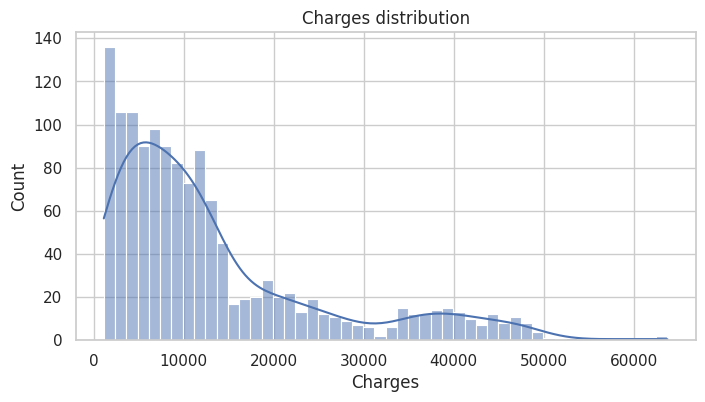

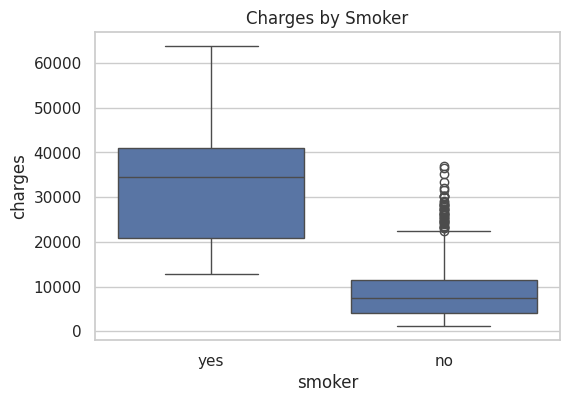

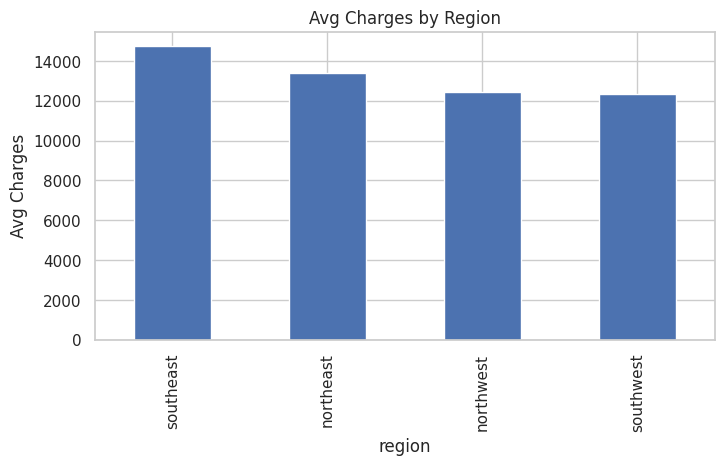

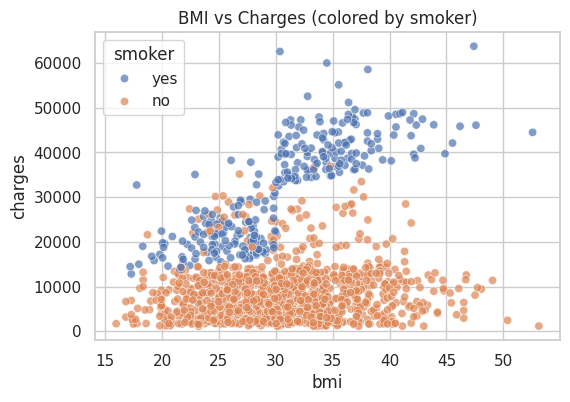

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Distribution of charges
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Charges distribution'); plt.xlabel('Charges'); plt.show()

# Boxplot charges by smoker
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker'); plt.show()

# Avg charges by region
plt.figure(figsize=(8,4))
df.groupby('region')['charges'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Avg Charges by Region'); plt.ylabel('Avg Charges'); plt.show()

# Scatter income not present here; scatter BMI vs charges
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('BMI vs Charges (colored by smoker)'); plt.show()

**Save cleaned CSV **

In [ ]:
clean_path = "/content/medical_insurance_claims_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned file to:", clean_path)

Saved cleaned file to: /content/medical_insurance_claims_cleaned.csv


**Download Cleaned dataset**

In [ ]:
from google.colab import files
files.download(clean_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>